<a href="https://colab.research.google.com/github/JoeAM11/MachineLearning_EM23/blob/main/Tarea03_ML_Enero_StatsCorrPruebas_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ü§ñ üìì

## Tarea #03

Nombre :Joel Alejandro Rodarte Rivera <br>
Matr√≠cula: 2173260 <br>

El siguiente cuaderno contiene: 

* Estad√≠sticos descriptivos de una data frame.
  * Resultados completos y divididos por grupos. <br>
* Histogramas ajustados para mi base de datos, la cual tiene variables con distribuci√≥n binomial.
* Correlaci√≥n de todas las variables con sus interpretaci√≥nes.
* Resultados gr√°ficos de todo lo anterior.



In [74]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MachineLearning_EM23/Testing.csv') #Importar el csv desde mi repositorio en Guthub

fatal: destination path 'MachineLearning_EM23' already exists and is not an empty directory.


In [126]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10) #Para evitar que me trunque informaci√≥no o que no despliegue tanta, segun sea necesario 

In [41]:
df = df[df.columns[::-1]] # Me es m√°s logico tener la enfermedad en la primera columna por motivos de organizaci√≥n. 

In [ ]:
df.head()

In [127]:
df.sum(axis = 1) 
#Esto me podr√≠a servir para identificar cu√°l es la enfermedad con m√°s s√≠ntomas. Podria despues a signarle un valor de dolor a cada s√≠ntoma y multiplicalo por su valor booleano para saber cu√°l es la enfermded m√°s dolorosa.
df.sum() #Para encontrar el s√≠tnoma m√°s comn

<ipython-input-127-5745f159c114>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis = 1)


itching                                                                 7
skin_rash                                                               8
nodal_skin_eruptions                                                    1
continuous_sneezing                                                     2
shivering                                                               1
                                              ...                        
inflammatory_nails                                                      1
blister                                                                 1
red_sore_around_nose                                                    2
yellow_crust_ooze                                                       1
prognosis               Fungal infectionAllergyGERDChronic cholestasis...
Length: 133, dtype: object

# Estad√≠tica descriptiva

In [69]:
df.describe() #obtener los estad√≠sticos descriptivos para todas las variables de mi df en una sola tabla

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering  ...  small_dents_in_nails  inflammatory_nails    blister  \
count  42.000000  ...             42.000000           42.000000  42.000000   
mean    0.023810  ...              0.023810            0.023810   0.023810   
std     0.154303  ...              0.154303            0.154303   0.154303   
min     0.000000  ...              0.000000            0.000000   0.000000   
25%     0.000000  ...              0.000000            0.000000   0.000000   
50%     0.000000  ...              0.000000            0.000000   0.000000   
75%     0.000000  ...              0.000000            0.000000   0.000000   
max     1.000000  ...              1.000000            1.000000   1.000000   

       red_sore_around_nose  yellow_crust_ooze  
count             42.000000          42.000000  
mean               0.047619           0.023810  
std                0.215540           0.154303  
min                0.000000           0.000000  
25%                0.000000           0.000000  
50%                0.000000           0.000000  
75%                0.000000           0.000000  
max                1.000000           1.000000  

[8 rows x 132 columns]

In [68]:
df_g_itching = df.groupby('prognosis') #si quisiera ver estadisticos diferenciados por enfermedad lo podr√≠a hacer
df_g_itching.describe()
#Actualmente no a√±ade mucho valor dado que solo tengo valores de 0s y 1s  

itching                     ...  \
                                          count mean std  min  25%  ...   
prognosis                                                           ...   
(vertigo) Paroymsal  Positional Vertigo     1.0  0.0 NaN  0.0  0.0  ...   
AIDS                                        1.0  0.0 NaN  0.0  0.0  ...   
Acne                                        1.0  0.0 NaN  0.0  0.0  ...   
Alcoholic hepatitis                         1.0  0.0 NaN  0.0  0.0  ...   
Allergy                                     1.0  0.0 NaN  0.0  0.0  ...   
...                                         ...  ...  ..  ...  ...  ...   
Tuberculosis                                1.0  0.0 NaN  0.0  0.0  ...   
Typhoid                                     1.0  0.0 NaN  0.0  0.0  ...   
Urinary tract infection                     1.0  0.0 NaN  0.0  0.0  ...   
Varicose veins                              1.0  0.0 NaN  0.0  0.0  ...   
hepatitis A                                 1.0  0.0 NaN  0.0  0.0  ...   

                                        yellow_crust_ooze                      
                                                      min  25%  50%  75%  max  
prognosis                                                                      
(vertigo) Paroymsal  Positional Vertigo               0.0  0.0  0.0  0.0  0.0  
AIDS                                                  0.0  0.0  0.0  0.0  0.0  
Acne                                                  0.0  0.0  0.0  0.0  0.0  
Alcoholic hepatitis                                   0.0  0.0  0.0  0.0  0.0  
Allergy                                               0.0  0.0  0.0  0.0  0.0  
...                                                   ...  ...  ...  ...  ...  
Tuberculosis                                          0.0  0.0  0.0  0.0  0.0  
Typhoid                                               0.0  0.0  0.0  0.0  0.0  
Urinary tract infection                               0.0  0.0  0.0  0.0  0.0  
Varicose veins                                        0.0  0.0  0.0  0.0  0.0  
hepatitis A                                           0.0  0.0  0.0  0.0  0.0  

[41 rows x 1056 columns]

In [71]:
statistics.mode(df.itching) #Describe no incluye la moda por lo que lo calculamos con el la librer√≠a de statistics

0

In [73]:
df.itching.skew() # Valor positivo por lo que se interpreta que sesgo positivo es decir la mayor cantidad de elementos son mayores a la media

1.8558017135459277

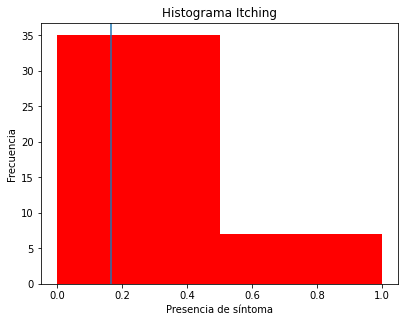

In [91]:
#histograma de una variable 
plt.figure(figsize = (6.4, 4.8)) # figura con tama√±o por defecto

plt.hist(df.itching, color='red',bins = 2) # El histograma con solo dos bins
plt.axvline(x = df.itching.mean(),label = '$\\bar{x}$') # Poner una linea en el la media 

plt.title('Histograma Itching')
plt.xlabel('Presencia de s√≠ntoma') # T√≠tulo del eje horizontal
plt.ylabel('Frecuencia') # T√≠tulo del eje vertical

plt.show()

# Correlaci√≥n

In [102]:
corr = df[['continuous_sneezing', 'shivering']].corr()
corr

continuous_sneezing  shivering
continuous_sneezing              1.00000    0.69843
shivering                        0.69843    1.00000

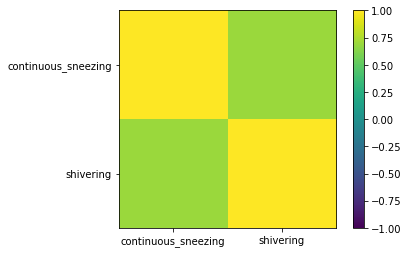

In [107]:
plt.figure()
plt.imshow(corr)
plt.xticks(ticks=[0, 1], labels=['continuous_sneezing', 'shivering']) #cambiar nombre de las x
plt.yticks(ticks=[0, 1], labels=['continuous_sneezing', 'shivering']) #Cambiar el nombre de las y 
plt.clim(vmin = -1, vmax = 1) #el rango de valores de la matriz 
plt.colorbar() # poner una barra de colores para su correlaci√≥n
plt.show()

In [125]:
# Correlaci√≥n de todos mis datos de manera num√©rica
df.corr()

itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.433861              0.349215   
skin_rash             0.433861   1.000000              0.321960   
nodal_skin_eruptions  0.349215   0.321960              1.000000   
continuous_sneezing  -0.100000  -0.108465             -0.034922   
shivering            -0.069843  -0.075755             -0.024390   
...                        ...        ...                   ...   
small_dents_in_nails -0.069843   0.321960             -0.024390   
inflammatory_nails   -0.069843   0.321960             -0.024390   
blister              -0.069843   0.321960             -0.024390   
red_sore_around_nose  0.200000   0.460977             -0.034922   
yellow_crust_ooze    -0.069843   0.321960             -0.024390   

                      continuous_sneezing  shivering  ...  \
itching                         -0.100000  -0.069843  ...   
skin_rash                       -0.108465  -0.075755  ...   
nodal_skin_eruptions            -0.034922  -0.024390  ...   
continuous_sneezing              1.000000   0.698430  ...   
shivering                        0.698430   1.000000  ...   
...                                   ...        ...  ...   
small_dents_in_nails            -0.034922  -0.024390  ...   
inflammatory_nails              -0.034922  -0.024390  ...   
blister                         -0.034922  -0.024390  ...   
red_sore_around_nose            -0.050000  -0.034922  ...   
yellow_crust_ooze               -0.034922  -0.024390  ...   

                      small_dents_in_nails  inflammatory_nails   blister  \
itching                          -0.069843           -0.069843 -0.069843   
skin_rash                         0.321960            0.321960  0.321960   
nodal_skin_eruptions             -0.024390           -0.024390 -0.024390   
continuous_sneezing              -0.034922           -0.034922 -0.034922   
shivering                        -0.024390           -0.024390 -0.024390   
...                                    ...                 ...       ...   
small_dents_in_nails              1.000000            1.000000 -0.024390   
inflammatory_nails                1.000000            1.000000 -0.024390   
blister                          -0.024390           -0.024390  1.000000   
red_sore_around_nose             -0.034922           -0.034922  0.698430   
yellow_crust_ooze                -0.024390           -0.024390  1.000000   

                      red_sore_around_nose  yellow_crust_ooze  
itching                           0.200000          -0.069843  
skin_rash                         0.460977           0.321960  
nodal_skin_eruptions             -0.034922          -0.024390  
continuous_sneezing              -0.050000          -0.034922  
shivering                        -0.034922          -0.024390  
...                                    ...                ...  
small_dents_in_nails             -0.034922          -0.024390  
inflammatory_nails               -0.034922          -0.024390  
blister                           0.698430           1.000000  
red_sore_around_nose              1.000000           0.698430  
yellow_crust_ooze                 0.698430           1.000000  

[132 rows x 132 columns]

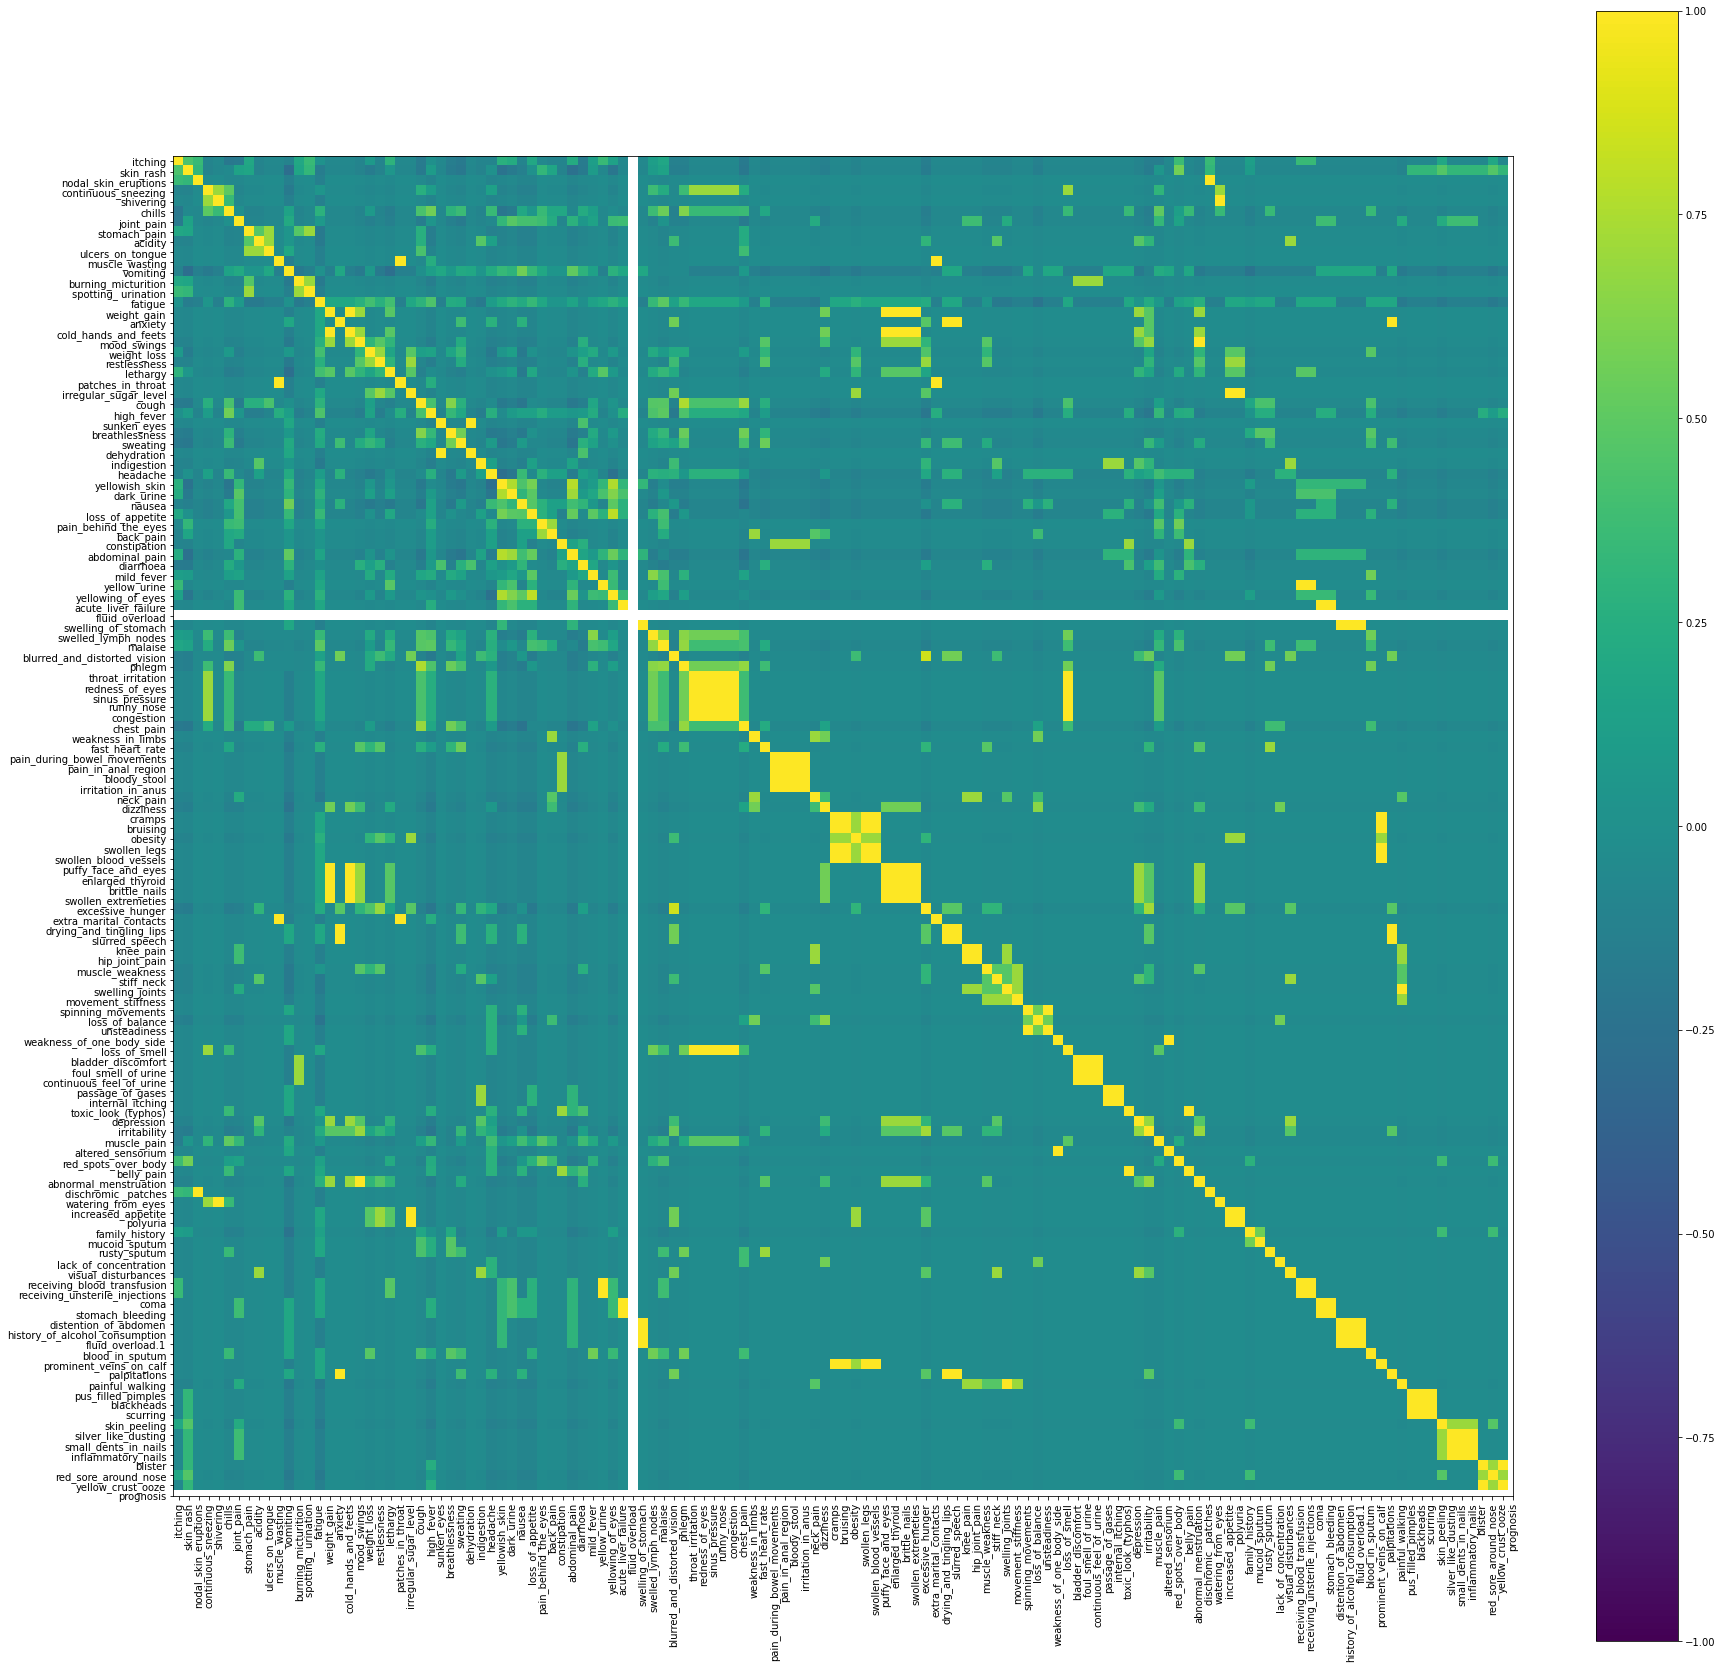

In [128]:
#Correlaci√≥n de todos mis datos de manera gr√°fica

plt.figure(figsize = (30, 30)) # Ajustar a una imagen m√°s grando dado tengo 133 variables 
corr_complete = df.corr()
ticks_ = list(range(len(df.columns))) # Para saber cuantas partici√≥nes necesito, es decir cuantas variables har√© la correlaci√≥n 
plt.imshow(corr_complete)
plt.xticks(ticks = ticks_, labels = df.columns, rotation = 90)
plt.yticks(ticks = ticks_, labels = df.columns)
plt.clim(vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

 # Con este plot descubri que la variable fluid_overload solo tiene 0s y est√° haciendo algo extra√±o con la matriz 

# Interpetaci√≥nes de correlaci√≥n 

Muy buena correlaci√≥n ‚Üí >.9 o m√°s <br>
Buena correlacion ‚Üí entre .7 y .9 <br>
Moderada correlaci√≥n ‚Üí entre .4 y .7 <br>
Baja correlaci√≥n -->  entre .2 y .4 <br>
Muy baja correlaci√≥n --> entre 0 y .2 <br>

<br>

#### Itching vs skin rash 
* Corr = 0.433861 
* Tipo de correlaci√≥n: Positiva
* Nivel de correlaci√≥n: Moderada
* Interpretaci√≥n: La relaci√≥n lineal entre las variables es moderada, es decir existe una relacion de .43 que puede ser explicado por la relaci√≥n de las variables, el resto se atribuye a factores externos.A medida que una variable aumenta la otra aumenta tambi√©n.


#### Skin Rash vs continous sneezing
* Corr = -0.108465
* Tipo de correlaci√≥n: Negativa
* Nivel de correlaci√≥n: Muy Baja
* Interpretaci√≥n: La relaci√≥n lineal entre las variables es muy baja, es decir existe una relacion de -.108 que puede ser explicado por la relaci√≥n de las variables, el resto se atribuye a factores externos. A medida que una variable aumenta la otra disminuye lo cual puede indicar que la existencia de un s√≠ntoma es dific√≠l de encontrar si el otro est√° presente. 

#### Continous sneezing vs shivering
* Corr = 0.698430
* Tipo de correlaci√≥n: Positiva
* Nivel de correlaci√≥n: Moderada
* Interpretaci√≥n: La relaci√≥n lineal entre las variables es moderada, es decir existe una relacion de .69 que puede ser explicado por la relaci√≥n de las variables, el resto se atribuye a factores externos.A medida que una variable aumenta la otra aumenta tambi√©n.


# Prueba de hip√≥tesis 

La correlaci√≥n entre continuos sneezing y shivering fue de .69 lo cual en primera instancia indica que existe una moderada relaci√≥n lineal entre las variables. El siguiente paso es comprobar si esta relaci√≥n es significativamente diferente. Para ello se realiza la siguiente prueba estad√≠stica. 

* H0: El coeficiente de correlaci√≥n NO ES significativamente diferente de cero. NO HAY ninguna relaci√≥n lineal significativa.

* Ha: El coeficiente de correlaci√≥n ES significativamente DIFERENTE de cero. EXISTE UNA RELACI√ìN LINEAL SIGNIFICATIVA.

Rechazo H0 si pvalor < .05


In [146]:
lr = df.loc[:,['continuous_sneezing', 'shivering']]
lr

continuous_sneezing  shivering
0                     0          0
1                     1          1
2                     0          0
3                     0          0
4                     0          0
..                  ...        ...
37                    0          0
38                    0          0
39                    0          0
40                    0          0
41                    0          0

[42 rows x 2 columns]

In [155]:
import statsmodels.api as sm

#define predictor and response variables
y = df.continuous_sneezing
x = df.shivering

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     continuous_sneezing   R-squared (uncentered):                   0.500
Model:                             OLS   Adj. R-squared (uncentered):              0.488
Method:                  Least Squares   F-statistic:                              41.00
Date:                 Sun, 29 Jan 2023   Prob (F-statistic):                    1.16e-07
Time:                         00:36:50   Log-Likelihood:                          18.896
No. Observations:                   42   AIC:                                     -35.79
Df Residuals:                       41   BIC:                                     -34.05
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
import statsmodels.api as sm

#define predictor and response variables
y = df.continuous_sneezing
x = df.shivering

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

In [157]:
for x in range (0, 1):
    print(model.pvalues[x])

1.1553290422336939e-07


# Conclusi√≥n 


Rechazo H0 si pvalor < .05

pvalor = 1.1553290422336939e-07

Conclusi√≥n:
* Hay pruebas suficientes para concluir que existe una relaci√≥n lineal significativa entre la x y la y porque el coeficiente de correlaci√≥n es significativamente diferente de cero. Rechazo H0


Referencias: <br>


[12.4 Comprobaci√≥n de la importancia del coeficiente de correlaci√≥n](https://openstax.org/books/introducci%C3%B3n-estad%C3%ADstica/pages/12-4-comprobacion-de-la-importancia-del-coeficiente-de-correlacion#:~:text=La%20prueba%20de%20hip%C3%B3tesis%20nos,tama%C3%B1o%20de%20la%20muestra%20n.)

[How to Extract P-Values from Linear Regression in Statsmodels](https://www.statology.org/statsmodels-linear-regression-p-value/)

